In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [358]:
data = pd.read_csv('../data/INvideos_cc50.csv')

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [359]:
categories = pd.read_json('../data/IN_category_id.json')

## Inspeccionar los Datos

In [360]:
#nombre de columnas
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [361]:
#tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [362]:
data.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


In [363]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


Observaciones:

* trending_date está en formato año, dia, mes
* Es necesario convertir a dato booleano o numérico los campos con categorías verdadero o falso

In [364]:
categories = pd.read_json('../data/IN_category_id.json')

In [365]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [366]:
categories = pd.json_normalize(categories['items'])

In [367]:
categories.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [368]:
# Creamos variables ficticias para las caracteristicas "Sex" y "Embarked"
#sex = pd.get_dummies(data['Sex'],drop_first=True)
#embark = pd.get_dummies(data['Embarked'],drop_first=True)

##  Pre-Procesar los Datos

In [369]:
# a fecha: trending_date , publish_time | yyyy-mm-dd 
# con hora: publish_time
# separar en 2 columnas float: geometry
# VERDADERO |	FALSO	boolean : ratings_disabled , comments_disabled , video_error_or_removed
# int : views
# eliminar ? : thumbnail_link , title , description
# describir categoria : category_id
# a categoría ?? : channel_title , state
# ??? tags

### Comprobación de datos faltantes

Comenzamos eliminando la columna "description" porque la data no nos servirá para el desarrollo del trabajo.

In [370]:
data.drop(columns=['description'], inplace=True)

#### Observación de datos faltantes

<AxesSubplot:>

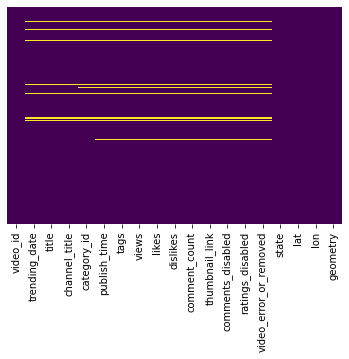

In [371]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [372]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,மகாதேவன்,டி.டி.வி.தினகரன்,பாஸ்கரன்,சுதாகரன்,ராஜராஜன்,குலோத்துங்கன்,டாக்டர்.வெங்கடேஷ் என பலருமே இப்போது ரெய்டு வள...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,அவர் சேர்த்து வைத்த பணமே கண்டமாகி விட்டது.சசி...,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...,புனேயில் எம்பிஏ முடித்து விட்டு பெங்களூருவில்...,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
118,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
120,\n\nOneindia Tamil\nSubscribe for More Videos....,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe :https://www....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38255,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349)
38256,Must-See WWE videos on YouTube: https://goo.gl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


### Limpieza de datos repetidos

In [373]:
#Visualizacion de registros duplicados
data[data.duplicated(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep=False)].sort_values(by=["video_id","title","channel_title","trending_date","publish_time","views","likes"])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
38191,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741)
38314,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38372,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Haryana,28.450006,77.019991,POINT (77.01999101 28.45000633)
38497,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217)
33145,#NAME?,18.16.05,2018 Karnataka Election Results With Arnab Gos...,Republic World,25.0,2018-05-15T05:00:27.000Z,"karnataka elections 2018|""karnataka elections ...",333692.0,1316.0,408.0,157.0,https://i.ytimg.com/vi/-jYTsolMGUg/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhattisgarh,22.090420,82.159987,POINT (82.15998734 22.09042035)
37925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
37928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576)
37931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)


Se observa que existen varios datos duplicados en el dataset. Se pasará a elminar los datos duplicados y nos quedaremos con el ultimo registro.

#### Eliminación de datos duplicados

In [374]:
data.drop_duplicates(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep="last", inplace=True)
    

Se utilizó como criterio para eleminar los datos duplicados por el "video_id", "title", "channel_title" y "publish_time". Esto se debe a que si presenta el mismo ID, mismo título y el mismo nombre del canal y misma hora y fecha de publicación se puede decir con seguridad que se trata del mismo video.

### Estandarización de tipo de datos

In [375]:
import datetime as dt

In [376]:
data['publish_time'] = pd.to_datetime(data['publish_time'],errors="coerce")

In [377]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m",errors="coerce")

In [378]:
#data['comments_disabled'].apply( vf_to_boolean )
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']
] = data[['ratings_disabled','comments_disabled',
  'video_error_or_removed']].applymap(
  lambda x : True if x == 'VERDADERO' else False if x == 'FALSO'
  else np.NaN )

In [379]:
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']] = data[['ratings_disabled','comments_disabled', 'video_error_or_removed']].astype("bool")

In [380]:
data['views'] = pd.to_numeric(data['views'],errors="coerce",downcast='integer')
data['category_id'] = pd.to_numeric(data['category_id'],errors="coerce",downcast='integer')
data[['views','likes','dislikes','comment_count','category_id']] = data[['views','likes','dislikes','comment_count','category_id']].astype('Int64')

In [381]:
categories['id'] = pd.to_numeric(categories['id'],errors="coerce",downcast='integer')
categories['id'] = categories['id'].astype('Int64')

In [382]:
# separar en 2 columnas float: geometry?

In [383]:
categories['snippet.title'] = categories['snippet.title'].astype("category")
categories['snippet.title']

0         Film & Animation
1         Autos & Vehicles
2                    Music
3           Pets & Animals
4                   Sports
5             Short Movies
6          Travel & Events
7                   Gaming
8            Videoblogging
9           People & Blogs
10                  Comedy
11           Entertainment
12         News & Politics
13           Howto & Style
14               Education
15    Science & Technology
16                  Movies
17         Anime/Animation
18        Action/Adventure
19                Classics
20                  Comedy
21             Documentary
22                   Drama
23                  Family
24                 Foreign
25                  Horror
26          Sci-Fi/Fantasy
27                Thriller
28                  Shorts
29                   Shows
30                Trailers
Name: snippet.title, dtype: category
Categories (30, object): ['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles', 'Classics', ..., 'Thriller', 'Trailers', 

### Limpieza de datos NA

In [384]:
#Si el dato faltante es el video_id, entonces, se removerán dichas observaciones.

In [385]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

#### Comprobamos datos nulos dentro del dataframe

In [386]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,NaT,டி.டி.வி.தினகரன்,பாஸ்கரன்,<NA>,NaT,குலோத்துங்கன்,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,NaT,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,<NA>,NaT,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
586,\nഇന്ത്യന്‍ സിനിമാ ആരാധകരെ മുഴുവന്‍ കോരിത്തരിപ...,NaT,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe : https://goo...,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Lakshadweep,10.562573,72.636867,POINT (72.63686717 10.56257331)
959,\nஜெயலலிதா உயிருடன் இருந்த போது அவருடனேயே இருந...,NaT,கிருஷ்ணப்ரியா,விவேக் 3 பேருமே போயஸ் கார்டனில் வளர்ந்தவர்கள்...,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37935,Current affairs playlist-,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Tripura,23.835404,91.279999,POINT (91.27999914 23.83540428)
37936,https://www.youtube.com/watch?v=ZFy9-nslWQk&li...,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


In [387]:
data[data.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 116 to 38482
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                231 non-null    object             
 1   trending_date           0 non-null      datetime64[ns]     
 2   title                   72 non-null     object             
 3   channel_title           35 non-null     object             
 4   category_id             0 non-null      Int64              
 5   publish_time            0 non-null      datetime64[ns, UTC]
 6   tags                    8 non-null      object             
 7   views                   0 non-null      Int64              
 8   likes                   0 non-null      Int64              
 9   dislikes                0 non-null      Int64              
 10  comment_count           0 non-null      Int64              
 11  thumbnail_link          0 non-null      o

Por ultimo eliminamos los datos que tengan NA en "publish_time" y "trending_date"

In [388]:
data.dropna(subset=["publish_time","trending_date"],inplace=True)

In [389]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry


### Datos procesados

In [390]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33106 entries, 0 to 38532
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                33106 non-null  object             
 1   trending_date           33106 non-null  datetime64[ns]     
 2   title                   33106 non-null  object             
 3   channel_title           33106 non-null  object             
 4   category_id             33106 non-null  Int64              
 5   publish_time            33106 non-null  datetime64[ns, UTC]
 6   tags                    33106 non-null  object             
 7   views                   33106 non-null  Int64              
 8   likes                   33106 non-null  Int64              
 9   dislikes                33106 non-null  Int64              
 10  comment_count           33106 non-null  Int64              
 11  thumbnail_link          33106 non-null  o

In [392]:
data.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,33106.000000,3.310600e+04,3.310600e+04,3.310600e+04,33106.000000,33106.000000,33106.000000
mean,21.630762,9.936712e+05,2.550963e+04,1.571959e+03,2518.346433,22.671406,82.113516
std,6.491663,3.140401e+06,9.626428e+04,1.688946e+04,14760.556050,6.819211,7.448237
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,8.900373,72.636867
25%,23.000000,1.125612e+05,7.860000e+02,9.700000e+01,72.000000,19.250232,76.569993
50%,24.000000,2.745020e+05,2.751000e+03,2.890000e+02,297.000000,23.835404,78.570026
75%,24.000000,7.307798e+05,1.199475e+04,9.300000e+02,1165.750000,27.333330,88.616647
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,34.299959,94.216667


In [393]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kind                31 non-null     object  
 1   etag                31 non-null     object  
 2   id                  31 non-null     Int64   
 3   snippet.channelId   31 non-null     object  
 4   snippet.title       31 non-null     category
 5   snippet.assignable  31 non-null     bool    
dtypes: Int64(1), bool(1), category(1), object(3)
memory usage: 2.5+ KB


### Requerimientos

#### Por Categoría de Videos

In [394]:
data[['views','likes','dislikes','comment_count']] = data[['views','likes','dislikes','comment_count']].astype(int)

In [395]:
data.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'state', 'lat',
       'lon', 'geometry'], dtype=object)

In [396]:
data_cat = data.join(categories.set_index('id'), on='category_id')
data_cat.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...",UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


In [397]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33106 entries, 0 to 38532
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                33106 non-null  object             
 1   trending_date           33106 non-null  datetime64[ns]     
 2   title                   33106 non-null  object             
 3   channel_title           33106 non-null  object             
 4   category_id             33106 non-null  object             
 5   publish_time            33106 non-null  datetime64[ns, UTC]
 6   tags                    33106 non-null  object             
 7   views                   33106 non-null  int32              
 8   likes                   33106 non-null  int32              
 9   dislikes                33106 non-null  int32              
 10  comment_count           33106 non-null  int32              
 11  thumbnail_link          33106 non-null  o

In [398]:
print(len(data),len(data_cat))

33106 33106


In [429]:
def showCatsBy(by): #views
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow').set(title= by +' por categoría')

In [447]:
def outliersToMax(cat, since:int, col = 'views'):
  nCat = len(data_cat[data_cat['snippet.title'] == cat])
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print( ' Cantidad de datos de entretainment:', nCat, '\n', 'Cantidad de datos outliers:', nCatOut )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print(f'''De {nCat} filas, {nCatOut} son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a {since}.''')
  data_cat[col].loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>since)] = (
    data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  

##### 1. ¿Qué categorías de videos son las de mayor tendencia?

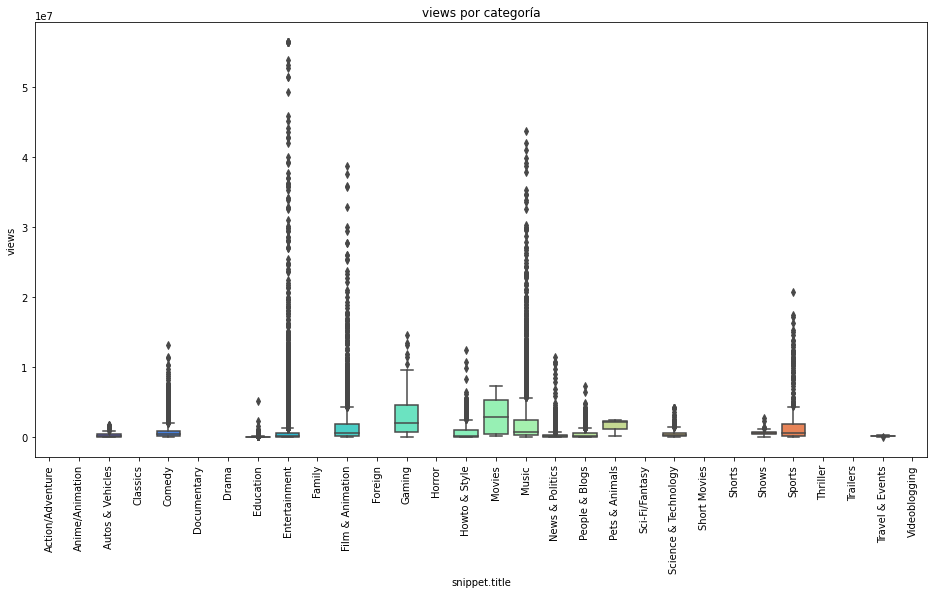

In [433]:
showCatsBy('views')

In [448]:
outliersToMax('Entertainment', 0.6 * 1e8, 'views')

 Cantidad de datos de entretainment: 14766 
 Cantidad de datos outliers: 0


C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\4212360618.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\4212360618.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable


De 14766 filas, 0 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 60000000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\4212360618.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\4212360618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable


In [402]:
data_cat.loc[data_cat['views']>0.6 * 1e8, 'views'] = data_cat[data_cat['views']<0.6 * 1e8]['views'].max()

In [403]:
data_cat[data_cat['views']>0.6 * 1e8]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable


In [404]:
print( ' Cantidad de datos de Science & Technology:', len(data_cat[data_cat['snippet.title']=='Science & Technology']),
  '\n', 'Cantidad de datos outliers:', len(data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']>5*1e6]) )

 Cantidad de datos de Science & Technology: 518 
 Cantidad de datos outliers: 8


C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\2188740060.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  '\n', 'Cantidad de datos outliers:', len(data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']>5*1e6]) )


In [405]:
data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']>5*1e6]

C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\424030259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']>5*1e6]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
6136,ot0O9iSxzgQ,2017-12-14,Dravid spends a #DayWithPixel2,Google India,28,2017-12-12 01:04:51+00:00,"Rahul dravid|""google""|""pixel 2""|""google pixel ...",10161505,37280,8009,...,False,Chandigarh,30.719997,76.780006,POINT (76.78000565000001 30.71999697),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
16359,aBr2kKAHN6M,2018-02-07,Live Views of Starman,SpaceX,28,2018-02-06 21:38:22+00:00,[none],6401464,165883,2331,...,False,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
21503,lkfpqGWzHCE,2018-03-09,Searching for Gender Equality — International ...,Google,28,2018-03-07 16:00:55+00:00,"Google Commercial|""Google""|""International Wome...",15316016,37245,30746,...,False,Orissa,19.820430,85.900017,POINT (85.90001746 19.82042971),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
21700,lkfpqGWzHCE,2018-03-10,Searching for Gender Equality — International ...,Google,28,2018-03-07 16:00:55+00:00,"Google Commercial|""Google""|""International Wome...",20974711,42225,33419,...,False,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
21903,lkfpqGWzHCE,2018-03-11,Searching for Gender Equality — International ...,Google,28,2018-03-07 16:00:55+00:00,"Google Commercial|""Google""|""International Wome...",25778367,43895,34351,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
22113,lkfpqGWzHCE,2018-03-12,Searching for Gender Equality — International ...,Google,28,2018-03-07 16:00:55+00:00,"Google Commercial|""Google""|""International Wome...",29810427,44644,35349,...,False,Manipur,24.799971,93.950017,POINT (93.95001705 24.79997072),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
22328,lkfpqGWzHCE,2018-03-13,Searching for Gender Equality — International ...,Google,28,2018-03-07 16:00:55+00:00,"Google Commercial|""Google""|""International Wome...",33541991,45007,36086,...,False,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
22505,lkfpqGWzHCE,2018-03-14,Searching for Gender Equality — International ...,Google,28,2018-03-07 16:00:55+00:00,"Google Commercial|""Google""|""International Wome...",35276532,45148,36352,...,False,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True


In [406]:
data_cat['views'].loc[(data_cat['snippet.title']=='Science & Technology') & (data_cat['views']>5*1e6)] = data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']<5*1e6]['views'].max()

C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\3808343002.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat['views'].loc[(data_cat['snippet.title']=='Science & Technology') & (data_cat['views']>5*1e6)] = data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']<5*1e6]['views'].max()
c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [407]:
data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']>5*1e6]

C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\424030259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title']=='Science & Technology'][data_cat['views']>5*1e6]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable


[Text(0.5, 1.0, 'Tendencia por categoría')]

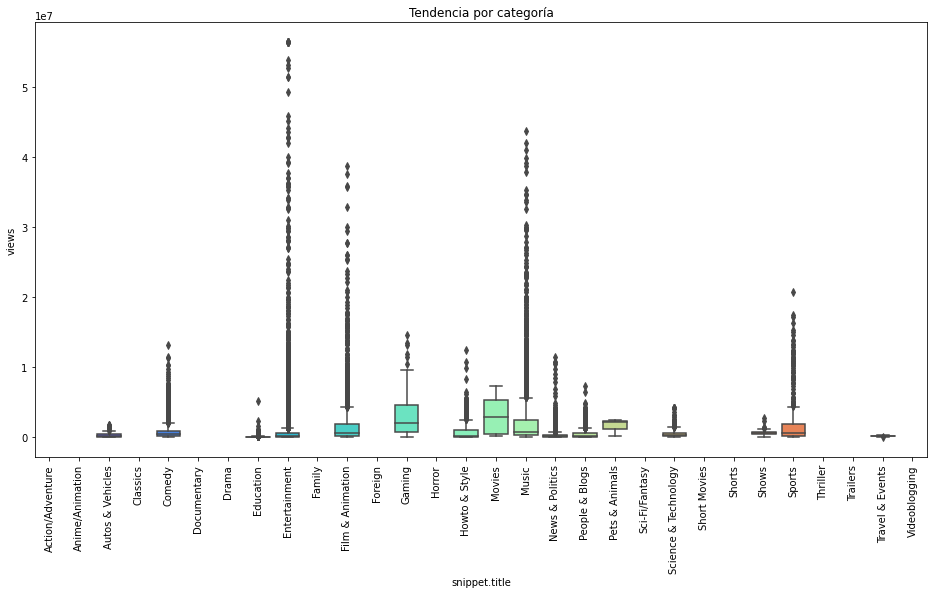

In [408]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x="snippet.title", y="views", data=data_cat, palette='rainbow').set(title='Tendencia por categoría')

[Text(0.5, 1.0, 'Tendencia por categoría')]

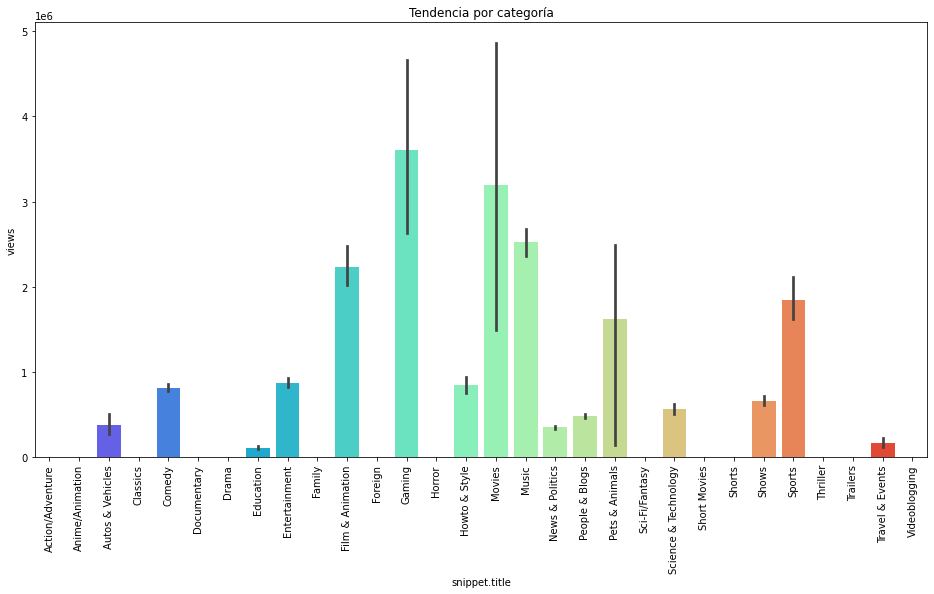

In [420]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="views", data=data_cat, palette='rainbow').set(title='Tendencia por categoría')

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Movies y Music, siendo la categoría de Movies la que puede alcanzar puntos muy diferenciados de tendencia.

##### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

[Text(0.5, 1.0, 'Likes por categoría')]

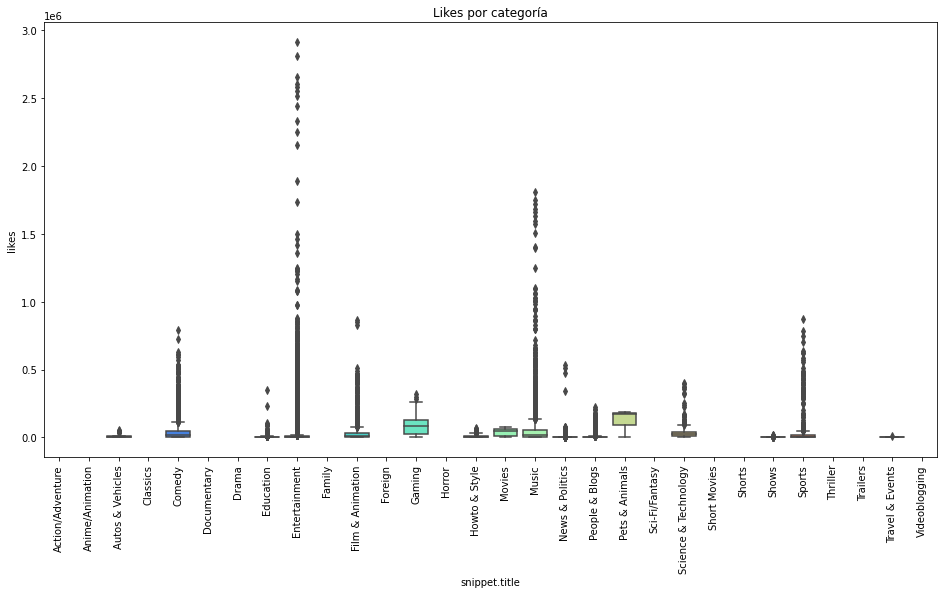

In [423]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x="snippet.title", y="likes", data=data_cat, palette='rainbow').set(title='Likes por categoría')

In [428]:
print( ' Cantidad de datos de Entertainment:', len(data_cat[data_cat['snippet.title']=='Entertainment']),
  '\n', 'Cantidad de datos outliers:', len(data_cat[data_cat['snippet.title']=='Entertainment'][data_cat['likes']>1*1e6]) )

 Cantidad de datos de Entertainment: 14766 
 Cantidad de datos outliers: 28


C:\Users\GART-03\AppData\Local\Temp\ipykernel_15568\3635530041.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  '\n', 'Cantidad de datos outliers:', len(data_cat[data_cat['snippet.title']=='Entertainment'][data_cat['likes']>1*1e6]) )


##### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [411]:
data_cat_ld = data_cat[["snippet.title","likes","dislikes"]].melt('snippet.title', var_name='cols', value_name='vals')
data_cat_ld.head()

,snippet.title,cols,vals
0,Film & Animation,likes,33966
1,News & Politics,likes,735
2,Entertainment,likes,2011
3,Comedy,likes,70353
4,Entertainment,likes,492


<AxesSubplot:xlabel='snippet.title', ylabel='vals'>

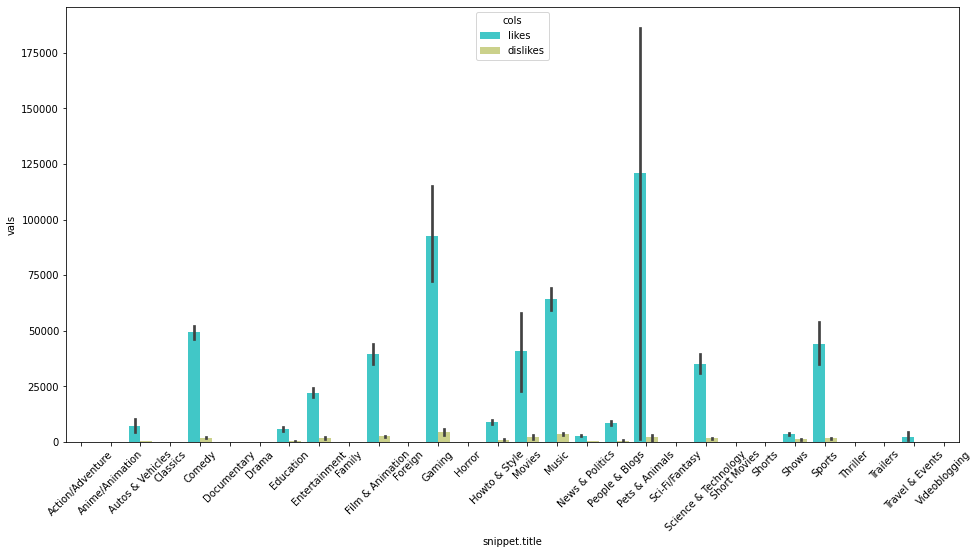

In [412]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x="snippet.title", y="vals", hue='cols', data=data_cat_ld, palette='rainbow')

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

#### Por el tiempo transcurrido

##### 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

En primer lugar, se necesita identificar el rango de fechas del dataset. 

In [413]:
data_cat.sort_values(by="trending_date").head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
132,zWAjEtFkMgY,2017-11-14,Weekly Rasi Phalalu 2017 November 12th - Novem...,muluguastro,22,2017-11-11 19:00:03+00:00,"Telugu Panchangam 2016|""Ugadi Panchangam 2016""...",37384,164,32,...,False,Jammu And Kashmir,34.299959,74.466658,POINT (74.46665849 34.29995933),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
133,fRY7UWGFvdc,2017-11-14,ഇടുക്കി ആശുപത്രിയിൽ രോഗികളെ ക്യൂവിൽ നിർത്തിയ ജ...,Malayalam News Time,22,2017-11-12 11:04:59+00:00,[none],197122,0,0,...,False,Jammu And Kashmir,34.299959,74.466658,POINT (74.46665849 34.29995933),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
134,Dxg-ELOg-L4,2017-11-14,Nayanthara Visits Kasi Theatre For Aramm Promo...,Cineulagam,24,2017-11-11 10:42:05+00:00,Nayanthara Visits Kasi Theatre For Aramm Promo...,94383,168,18,...,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
135,D1z2sKcSsfY,2017-11-14,ARE YOU FRIENDZONED? ft. SheTroubleMaker | Ris...,Rishhsome,23,2017-11-11 13:55:16+00:00,"rishhsome|""vines""|""rishabh rana""|""rishabh""|""fu...",353789,25657,1949,...,False,Puducherry,11.934994,79.830000,POINT (79.83000036999999 11.93499371),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True


Como se observa, la tendencia de los videos comienzan el 14 de noviembre del 2017 en el dataset.

In [414]:
data_cat.sort_values(by="trending_date", ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
38532,wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,2018-06-10 04:29:54+00:00,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,...,False,Rajasthan,26.449999,74.639981,POINT (74.63998124 26.44999921),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
38451,0qAexDFUW2U,2018-06-14,अज्या दाखवणार भय्याला हिसका|Lagira Zhala Jee|1...,NIROM मराठी,24,2018-06-12 16:32:51+00:00,"lagira zhala jee|""zee marathi""|""nirom marathi""...",100169,312,46,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
38438,N3aySwVkLdo,2018-06-14,Fun Bucket JUNIORS | Episode 52 | Kids Funny V...,TeluguOne,23,2018-06-13 13:23:42+00:00,"fun bucket juniors|""episode 52""|""kids comedy""|...",54441,1050,75,...,False,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
38439,f4dp5yhdu1g,2018-06-14,RAMADAN VLOG 4.0 | DUDE SERIOUSLY,Dude Seriously,23,2018-06-13 17:33:48+00:00,"dude|""dude seriously""|""gujarati""|""gujju""|""gujj...",44412,2349,161,...,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
38440,Q5tj5ZmP7mk,2018-06-14,Yeh Pyar Nahi To Kya Hai (REPRISE) -Sad Love S...,LoveSHEET,10,2018-06-11 07:46:29+00:00,"rahul jain|""yeh pyaar nahi toh kya hai""|""yeh p...",351989,7579,430,...,False,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True


La tendencia de video en el dataset terminan el 14 de junio del 2018. Debido a que el dataset comprende los videos con unos 8 meses de diferencia, se evaluará la tendencia de videos por meses.

In [415]:
tendencia = data_cat["trending_date"]

In [416]:
tendencia

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
38528   2018-06-14
38529   2018-06-14
38530   2018-06-14
38531   2018-06-14
38532   2018-06-14
Name: trending_date, Length: 33106, dtype: datetime64[ns]

In [417]:
tendencia["year"] = tendencia["trending_date"].dt.year

KeyError: 'trending_date'

##  Visualizar los Datos